## Health Insurance Lead Prediction

#### Your Client FinMan is a financial services company that provides various financial services like loan, investment funds, insurance etc. to its customers. FinMan wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company. The company recommend health insurance to it's customers based on their profile once these customers land on the website. Customers might browse the recommended health insurance policy and consequently fill up a form to apply. When these customers fill-up the form, their Response towards the policy is considered positive and they are classified as a lead.

#### Once these leads are acquired, the sales advisors approach them to convert and thus the company can sell proposed health insurance to these leads in a more efficient manner.

#### Now the company needs your help in building a model to predict whether the person will be interested in their proposed Health plan/policy given the information about:

##### Demographics (city, age, region etc.)
##### Information regarding holding policies of the customer
##### Recommended Policy Information

<img src="Data_Dictionary.png">

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Data/train.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [5]:
df.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [6]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


<AxesSubplot:>

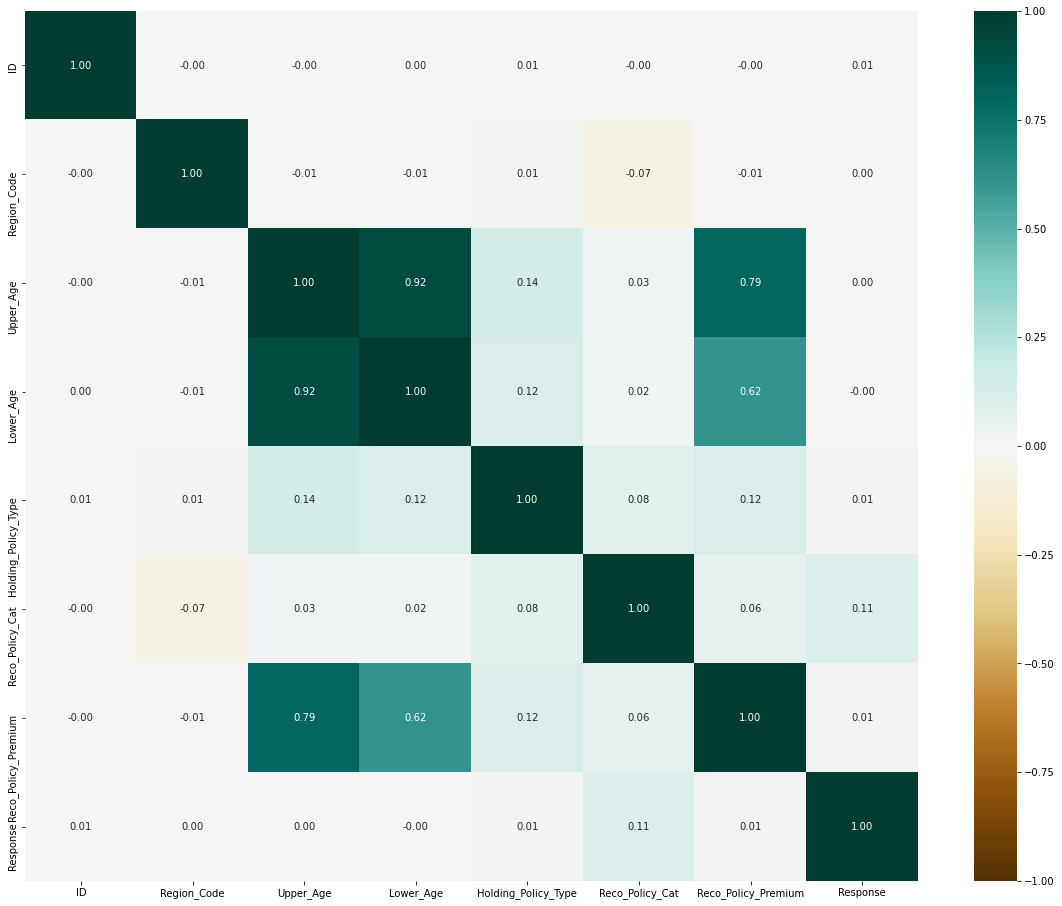

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,16))

sns.heatmap(df.corr(), 
            annot = True,
            cmap="BrBG",
            vmin=-1, vmax=1,
            center= 0,
            fmt='.2f'
           )

(array([1389., 4362., 4757., 3438., 2782., 2428., 1462., 2166., 2439.,
        2415., 2424., 2482., 2512., 1608., 2334., 2235., 2219., 1756.,
        1754., 3920.]),
 array([18.  , 20.85, 23.7 , 26.55, 29.4 , 32.25, 35.1 , 37.95, 40.8 ,
        43.65, 46.5 , 49.35, 52.2 , 55.05, 57.9 , 60.75, 63.6 , 66.45,
        69.3 , 72.15, 75.  ]),
 <BarContainer object of 20 artists>)

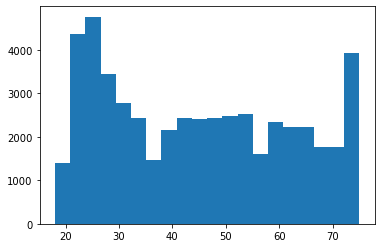

In [10]:
plt.hist(df['Upper_Age'],bins=20)

(array([ 848., 3079., 5342., 4697., 3421., 2802., 2407., 2152., 2202.,
        2235., 2279., 2244., 2296., 2350., 2168., 2107., 2105., 1574.,
        1535., 3039.]),
 array([16.  , 18.95, 21.9 , 24.85, 27.8 , 30.75, 33.7 , 36.65, 39.6 ,
        42.55, 45.5 , 48.45, 51.4 , 54.35, 57.3 , 60.25, 63.2 , 66.15,
        69.1 , 72.05, 75.  ]),
 <BarContainer object of 20 artists>)

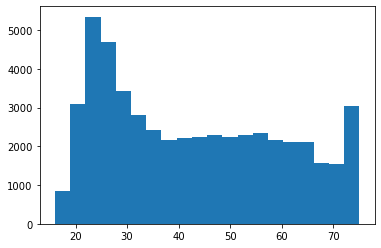

In [11]:
plt.hist(df['Lower_Age'],bins=20)

In [12]:
df1 = df.dropna()

In [13]:
df1.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [14]:
df1.shape

(23548, 14)

In [17]:
#Returns dataframe with only categorical columns
def check_categorical(dataset):
    cat_columns = dataset.select_dtypes(include=['object','category']).columns
    return dataset[cat_columns]
check_categorical(df1)

,City_Code,Accomodation_Type,Reco_Insurance_Type,Is_Spouse,Health Indicator,Holding_Policy_Duration
0,C3,Rented,Individual,No,X1,14+
3,C24,Owned,Joint,No,X1,14+
4,C8,Rented,Individual,No,X2,3.0
5,C9,Rented,Individual,No,X2,5.0
7,C1,Owned,Joint,Yes,X4,9.0
...,...,...,...,...,...,...
50875,C6,Rented,Individual,No,X3,2.0
50878,C5,Rented,Individual,No,X3,7.0
50879,C1,Rented,Individual,No,X2,14+
50880,C1,Owned,Joint,No,X2,2.0


In [18]:
check_categorical(df1).columns

Index(['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration'],
      dtype='object')

In [21]:
f_df = pd.get_dummies(df1,columns=['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration'],drop_first=True)

In [22]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23548 entries, 0 to 50881
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            23548 non-null  int64  
 1   City_Code                     23548 non-null  object 
 2   Region_Code                   23548 non-null  int64  
 3   Upper_Age                     23548 non-null  int64  
 4   Lower_Age                     23548 non-null  int64  
 5   Holding_Policy_Type           23548 non-null  float64
 6   Reco_Policy_Cat               23548 non-null  int64  
 7   Reco_Policy_Premium           23548 non-null  float64
 8   Response                      23548 non-null  int64  
 9   Accomodation_Type_Rented      23548 non-null  uint8  
 10  Reco_Insurance_Type_Joint     23548 non-null  uint8  
 11  Is_Spouse_Yes                 23548 non-null  uint8  
 12  Health Indicator_X2           23548 non-null  uint8  
 13  H

In [26]:
x1 = f_df.drop(['Response','City_Code'],axis=1)
y1 = f_df['Response']

[0.13238411 0.13365106 0.11084661 0.11229112 0.05544286 0.11941937
 0.13235028 0.02780391 0.00772332 0.00944918 0.0219098  0.01256925
 0.01634778 0.00662505 0.00697258 0.00161124 0.00119904 0.00080745
 0.00456117 0.0041335  0.00414679 0.00306754 0.00678746 0.00391213
 0.01142828 0.01065941 0.00960035 0.00741483 0.00886037 0.00470656
 0.00491677 0.00640082]


<AxesSubplot:>

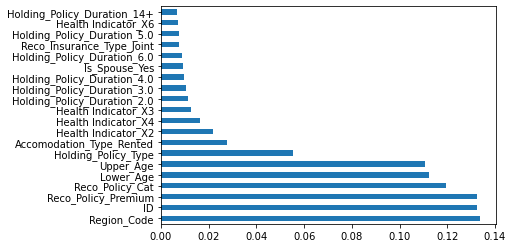

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

model_features_importance = ExtraTreesClassifier()
model_features_importance.fit(x1,y1)
print(model_features_importance.feature_importances_)
ranked_features = pd.Series(model_features_importance.feature_importances_,index=x1.columns)
ranked_features.nlargest(20).plot(kind='barh')

In [28]:
f = ranked_features.nlargest(20).index

In [29]:
df2 = f_df[f]
df2

,Region_Code,ID,Reco_Policy_Premium,Reco_Policy_Cat,Lower_Age,Upper_Age,Holding_Policy_Type,Accomodation_Type_Rented,Health Indicator_X2,Health Indicator_X4,Health Indicator_X3,Holding_Policy_Duration_2.0,Holding_Policy_Duration_3.0,Holding_Policy_Duration_4.0,Is_Spouse_Yes,Holding_Policy_Duration_6.0,Reco_Insurance_Type_Joint,Holding_Policy_Duration_5.0,Health Indicator_X6,Holding_Policy_Duration_14+
0,3213,1,11628.0,22,36,36,3.0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,4378,4,17780.0,19,48,52,3.0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,2190,5,10404.0,16,44,44,1.0,1,1,0,0,0,1,0,0,0,0,0,0,0
5,1785,6,15264.0,22,52,52,1.0,1,1,0,0,0,0,0,0,0,0,1,0,0
7,3175,8,29344.0,17,73,75,4.0,0,0,1,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50875,231,50876,13574.0,20,36,36,1.0,1,0,0,1,1,0,0,0,0,0,0,0,0
50878,4188,50879,5408.0,4,27,27,3.0,1,0,0,1,0,0,0,0,0,0,0,0,0
50879,442,50880,11374.0,12,63,63,1.0,1,1,0,0,0,0,0,0,0,0,0,0,1
50880,4,50881,28179.2,16,49,71,2.0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [31]:
df2 = f_df[f]
X = df2
y = f_df['Response']

In [36]:
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import roc_auc_score

X_train, X_test,y_train, y_test = tts(X,y, test_size=0.10, random_state=43)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

forest_clf = RandomForestClassifier()
forest_clf.fit(X_train, y_train)
forest_pred = forest_clf.predict(X_test)
score = roc_auc_score(y_test, forest_clf.predict_proba(X_test)[:, 1])
print("score:",score)

score: 0.6049668978191042
